# Mabda 2020 Exam, by Edoardo Gallo

This exam is a ** REGRESSION** problem. It asks you to predict the *SP500 monthly return rate* based on a set of indicators that can be: monthly stock prices indexex for the major world Economies (UK, EA, GER, IT, FR, JP, CA), financial market indicators (taken from Goyal and Welch) and macroeconomic indicators.

The *SP500 monthly return rate* are recorded in the dataset as **CRSP_SPvw**.

The financial market indicators from **Goyal and Welch** contains key variables related to the most important stock market features over time.

Extra information about the Goyal and Welch variables can be find at the following link: http://www.hec.unil.ch/agoyal/docs/Predictability_RFS.pdf

Extra information about the macroeconomic series and the meaning of their ticker can be found at the following link: https://s3.amazonaws.com/files.fred.stlouisfed.org/fred-md/Appendix_Tables_Update.pdf

The *timeseries_train.csv* dataset contains all these 3 groups of monthly variables from January 1970 to December 2009. All the variables have already been properly **stationarized**. The target variables (y) is the *SP500 monthly return rate (CRSP_SPvw)* while all the other variables are the predictors (X).

You need to use such predictors to train your algorithms in predicting the target variable.

The * timeseries_test.csv* dataset contains information **ONLY** about these 3 groups of monthly variables from January 2010 to March 2020. You do not have information about the *SP500 monthly return rate (CRSP_SPvw)* (target or y).

Following the steps below, you are required to use the *timeseries_train.csv* dataset to train your algorithms, select the best one with its hypeparameters properly calibrated and then apply such model to the *timeseries_test.csv* in order to predict the *SP500 monthly return rate*

### A) Upload, Clean and Manipulate the data.

1. Import all the necessary packages and functions you will need to perform the exercise

2. Import the dataset using the pd.read_csv() command. (Hint: remeber to specify the separator.)

3. Compute the percentage of NaN for each column and drop the columns that have less than 10years of observations, hence less than 120 NaN.

4. Create a list which contains all the names of the columns with at least one NaN value. (Hint: % bigger than zero, use command .loc()).

5. Fill the NaN using the median or the mean for each variable. If there are NaN at the end of the sample you can fill them using the .ffill(), which fills the NaN using the last available data point.

6. Check the type of the variables, dividing them among: Categorical, Dummy and Numerical. (Hint: use : select_dtypes(include=[type to include]).

7. Separate the dates from the dataset (they will be helpful to plot the charts), separate the target *SP500 monthly return rate (CRSP_SPvw)* (y) from the dataset.

8. Are there any Categorical variables? If yes, separate them from the Numerical.

9. Define the matrix of the predictors (X) using only the numerical variables inside the dataset.

10. Standardize only the predictors. (X)

11. If the answer to point A.8 is yes, transfor the Categorical vairbales in Dummy Variables and include them into the dataset. ( hint: use drop_first = true)

12. Compute the correlation of the new dataset and show the top 10 variables correlated with the target, **SP500 monthly return rate (CRSP_SPvw)**.

13. Separate the dates from the dataset (they will be helpful to plot the charts), separate the target *SP500 monthly return rate (CRSP_SPvw)* (y) from the dataset, and create the dataframe of the predictors. (X)

*Extra*: The dataset is quite big, but if you want to show some chart about the data, feel free to do it, sometimes visualize the data can help. You can produce different line plot between the target (SP500 monthly return rate) versus other variable to see if there are some commonalities among the data. (NOTE: the scale of the variables may be different, hence remember to standardize them before create such plots). 



### B) Fit and Estimate the models using a proper cross-validation exercise.

1. Split the X and the y obtained in the step above (A.8) into only: training and test sample. The size of the test needs to be = 0.15 use a random_state = 90.

2. Describe which models are you going to fit starting from the simplest to the most complicated. Explain why you have decided to use such models, which are their hyperparameters that need to be calibrated and which kind of cross-validation are you planning to use. To compare the different models during the training use as metric the ** negative mean squared error **. (Hint: in GridSearchCV the scoring needs to be = “neg_mean_squared_error”)

3. Create a section for each model you are going to fit. The models have to be fit sequentially and you need to do the following for EACH model you are going to use:
    1. Specify the function of the model you are going to use. (Hint: if the model has a random_state option, i.e. random forest, set it = 90)
    2. Specify a dictionary that contains the list of parameters you are going to cross-validate and the grid on which you intend to cross-validate them
    3. Specify the cross-validation function, GridSearchCV with all its option. The number of cv needs to be at least 5, maximum 10. – Remember to specify return_train_score = True. (HINT: You can build your own cross-validation function, but remebr that you are in a time-series framework hence the blocks should be sequential not random. Otherwise, you can use the function TimeSeriesSplit(n_splits = #num) and use that as input for the “cv” option inside the GridSearchCV function. 
    4. Fit the model using the training data. Print the value of the best hyperparameters of the model fitted. (**REMEMBER**: This is a time series exercise, hence you need to predict the one-step ahead value of the *CRSP_SPvw*, hence rememebr when you fit the model and also when you predict it to use the X (predictors), from 0 to end-1, and the y (target) from 1 to end.)
    5. Compute the TEST performances (using the test sample) using the mean squared error and the absolute mean squared error as metrics. Comment on these results. How are they in general? 
    6. Plot the y_hat_test_insample obtained from the model on the test data versus the real y_test. Does the model capture turning points?


**EXTRA 1**: If you fit a penalized logistic regression plot the evolution of both the training and test negative log loss with respect to the hyperparameter $\lambda$ (which is alpha in Python).


**EXTRA 2**: If you are not satisfied with the performances of the model, how could you improve them? 
Propose a solution and try to implement it in Python. (Hint: you can use PolynomialFeatures to add interactions among the variables, maybe among the most correlated one, or you can create new variables by adding different interactions among them (ratios or others).

### C) BEST MODEL SELECTION.

1. Compare all the TEST results for each model you have fitted and select the best model with its own best hyperparameters specification. Why this model is preferred than the others? What could be your intuition?

2. Load the *timeseries_test.csv* data, using the best model you have found above with its best hyperparameters (you don’t have to do any cross-validation exercise) produce the prediction for the target (call it **y_hat**)

3. Plot the y_hat you have produced.

4. Assuming you invested 1£ in the SP500 at the beginning of your test set, by applying the SP500 monthly return you have predicted, y_hat, what would be your predicted total return during the test period (from January 2010 to March 2020)?


PEOBLEMS: B)3.D- 3.E

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import keras
import tensorflow
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\GP_HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\GP_HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\GP_HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\GP_HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## A.2 : Data

In [2]:
data = pd.read_csv("timeseries_train.csv", sep = ";")
data

,dates,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,"France: Paris Stock Market: Price Index: CAC 40 (AVG, Dec-31-87=1000)","Germany: Stock Market Indexes: DAX Performance Index (AVG, Dec-30-87=1000)","Germany: Deutsche Boerse Market Capitalization (EOP, Mil.Euros)","Italy: Stock Price Index: FTSE MIB (AVG, Dec-31-97=24401.54)","Italy: Borsa Italiana Market Capitalization (EOP, Mil.EUR)","Japan: Nikkei Stock Average: TSE 225 Issues (AVG, May-16-49=100)","Japan: 1st Tokyo Stock Exchange: Market Capitalization (EOP, Bil.Yen)","U.K.: London Stock Exchange: FTSE 100 (EOP, Jan-2-84=1000)","UK: London Stock Exchange Market Capitalization (EOP, Mil.EUR)",CRSP_SPvw
0,31/01/70,NaN,NaN,0.700347,NaN,NaN,NaN,NaN,0.034473,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.075398
1,28/02/70,0.1055,-0.8764,0.670148,0.0005,0.0002,-0.0008,-0.0042,0.035855,-0.000617,...,NaN,NaN,NaN,NaN,NaN,-0.052014,3.491356,NaN,NaN,0.059521
2,31/03/70,0.1051,-0.8842,0.690327,-0.0074,-0.0009,-0.0015,0.0010,0.035842,-0.000417,...,NaN,NaN,NaN,NaN,NaN,5.830915,4.877206,NaN,NaN,0.002806
3,30/04/70,0.1050,-0.6535,0.736751,-0.0050,-0.0001,0.0007,0.0038,0.035712,-0.000100,...,NaN,NaN,NaN,NaN,NaN,-0.186356,-14.638008,NaN,NaN,-0.088831
4,31/05/70,0.1052,-0.6576,0.774228,-0.0012,0.0028,0.0028,0.0044,0.038661,0.000275,...,NaN,NaN,NaN,NaN,NaN,-17.819392,-1.173458,NaN,NaN,-0.054689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,31/08/09,-2.2805,16.7640,0.237594,0.0000,-0.0015,-0.0051,-0.0015,-0.008173,-0.000008,...,9.720526,8.620088,-0.412412,11.448841,6.690895,7.350982,1.740772,6.316916,4.972421,0.034751
476,30/09/09,-2.3337,14.3530,0.232310,-0.0001,-0.0013,-0.0027,-0.0012,-0.000063,-0.000042,...,5.304972,3.439032,3.729266,5.691791,4.732059,-1.229733,-5.469457,4.481572,1.638849,0.036534
477,31/10/09,-2.1085,70.3855,0.232299,-0.0005,0.0002,-0.0002,0.0017,0.003146,-0.000042,...,1.258146,1.705828,-4.673914,2.451208,-4.411161,-2.323525,-1.204183,-1.754724,-1.057252,-0.018259
478,30/11/09,-2.1539,40.9009,0.218105,-0.0005,0.0004,0.0003,-0.0014,0.007464,-0.000017,...,-0.724043,-0.669130,2.764711,-3.207440,-2.112982,-4.316345,-6.312860,2.855020,0.632146,0.060257


## A.3: dropping columns

In [3]:
# selecting the columns with less than 10 years observations(more than 120 Nans)
columns_to_drop = data.loc[:, np.sum(data.isnull()) > 120].columns
columns_to_drop

Index(['ACOGNO', 'Canada: TSX Group Market Capitalization (EOP, Mil.C$)',
       'EU 27: MSCI Share Price Index ex Div, LocCur (NSA, EOP, Dec-87=100)',
       'France: Paris Stock Market: Price Index: CAC 40 (AVG, Dec-31-87=1000)',
       'Germany: Stock Market Indexes: DAX Performance Index (AVG, Dec-30-87=1000)',
       'Germany: Deutsche Boerse Market Capitalization (EOP, Mil.Euros)',
       'Italy: Stock Price Index: FTSE MIB (AVG, Dec-31-97=24401.54)',
       'Italy: Borsa Italiana Market Capitalization (EOP, Mil.EUR)',
       'U.K.: London Stock Exchange: FTSE 100 (EOP, Jan-2-84=1000)',
       'UK: London Stock Exchange Market Capitalization (EOP, Mil.EUR)'],
      dtype='object')

In [4]:
#dropping the columns
print("dimension before dropping: {}".format(data.shape))
data = data.drop(columns_to_drop, axis = 1) 
print("dimension after dropping: {}".format(data.shape))


dimension before dropping: (480, 163)
dimension after dropping: (480, 153)


In [5]:
# I drop this column too, since in the test set has all nan values
data.drop('csp', axis = 1, inplace = True)

In [6]:
print("dimension after dropping: {}".format(data.shape))

dimension after dropping: (480, 152)


## A.4

In [7]:
# showing all the columns with at least 1 Nan value
data.loc[:, np.sum(data.isnull()) >= 1]

,D12,E12,tbl,AAA,BAA,lty,Rfree,D/Y,E/P 10y,TWEXAFEGSMTHx,UMCSENTx,"Canada: S&P/TSX Composite Index, Close Price (AVG, 1975=1000)","Canada: MSCI Share Price Index ex Div, US$ (NSA, EOP, Dec-69=100)","Japan: Nikkei Stock Average: TSE 225 Issues (AVG, May-16-49=100)","Japan: 1st Tokyo Stock Exchange: Market Capitalization (EOP, Bil.Yen)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1055,-0.8764,0.0005,0.0002,-0.0008,-0.0042,-0.000617,-0.987621,NaN,NaN,NaN,NaN,4.102746,-0.052014,3.491356
2,0.1051,-0.8842,-0.0074,-0.0009,-0.0015,0.0010,-0.000417,-1.037922,NaN,NaN,NaN,NaN,0.775571,5.830915,4.877206
3,0.1050,-0.6535,-0.0050,-0.0001,0.0007,0.0038,-0.000100,-1.038323,NaN,NaN,NaN,NaN,-12.404421,-0.186356,-14.638008
4,0.1052,-0.6576,-0.0012,0.0028,0.0028,0.0044,0.000275,-0.942430,NaN,NaN,NaN,NaN,-10.282468,-17.819392,-1.173458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-2.2805,16.7640,0.0000,-0.0015,-0.0051,-0.0015,-0.000008,-1.395314,-0.996895,-1.601524,-0.3,4.961329,-1.608526,7.350982,1.740772
476,-2.3337,14.3530,-0.0001,-0.0013,-0.0027,-0.0012,-0.000042,-1.451660,-1.005237,-1.584639,7.8,3.975804,6.785695,-1.229733,-5.469457
477,-2.1085,70.3855,-0.0005,0.0002,-0.0002,0.0017,-0.000042,-1.507845,-1.008023,-1.658745,-2.9,0.323243,-5.462480,-2.323525,-1.204183
478,-2.1539,40.9009,-0.0005,0.0004,0.0003,-0.0014,-0.000017,-1.509424,-1.007648,-0.602732,-3.2,1.061609,6.971495,-4.316345,-6.312860


## A.5: Replace Nan values

## Since the features seems to not have that much variance to choose the **median** as replacement, I will go with the **mean**

In [8]:
data.describe()

,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,ltr,...,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx,"Canada: S&P/TSX Composite Index, Close Price (AVG, 1975=1000)","Canada: MSCI Share Price Index ex Div, US$ (NSA, EOP, Dec-69=100)","Japan: Nikkei Stock Average: TSE 225 Issues (AVG, May-16-49=100)","Japan: 1st Tokyo Stock Exchange: Market Capitalization (EOP, Bil.Yen)",CRSP_SPvw
count,479.000000,479.000000,480.000000,479.000000,479.000000,479.000000,479.000000,480.000000,479.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,395.000000,479.000000,479.000000,479.000000,480.000000
mean,0.408698,0.456268,0.522211,-0.000162,-0.000055,-0.000052,-0.000049,0.011185,-0.000014,0.007382,...,-0.001141,-0.001588,-0.004171,0.001352,20.558079,0.620671,0.570901,0.307894,0.607270,0.008978
std,0.585932,6.001773,0.296665,0.005071,0.002542,0.002445,0.003381,0.020329,0.000423,0.031201,...,0.639619,2.410095,1.274555,1.124985,7.468124,4.077185,5.883142,4.730368,5.250364,0.045127
min,-2.333700,-52.828000,0.120510,-0.046200,-0.011800,-0.010200,-0.016400,-0.057654,-0.003850,-0.112400,...,-3.449091,-14.429009,-7.647989,-8.089393,10.484200,-24.201664,-31.683606,-28.500410,-22.129527,-0.215795
25%,0.108300,-0.678400,0.274474,-0.001550,-0.001200,-0.001300,-0.001800,0.001205,-0.000129,-0.010500,...,-0.238611,-0.929368,-0.535347,-0.593550,15.661175,-1.403755,-2.376727,-1.843206,-2.335465,-0.015899
50%,0.479500,0.738700,0.440460,0.000000,-0.000100,-0.000100,-0.000100,0.013372,0.000000,0.007800,...,0.001171,0.038803,0.083713,0.057688,18.926000,0.768887,0.942354,0.629102,0.880259,0.011994
75%,0.792300,1.802500,0.748185,0.001600,0.001100,0.001100,0.001700,0.026438,0.000133,0.024325,...,0.239743,0.956693,0.545772,0.637575,23.545775,3.241493,4.092420,3.135632,3.826297,0.038461
max,1.716900,70.385500,1.206530,0.026100,0.012900,0.015700,0.011400,0.045747,0.002175,0.152300,...,5.959410,13.810457,8.497566,4.962298,67.151000,10.973745,19.069660,14.219130,16.898864,0.168113


In [9]:
data.fillna(data.mean(), inplace = True)

# checking if the filling worked out
data.isnull().any().sum()

0

## A.6: Dividing continous and categorical

In [10]:
d_cont = data.select_dtypes(include = 'float64')
d_cat = data.select_dtypes(exclude = 'float64')



In [11]:
d_cat.head()

,dates,HWI
0,31/01/70,-153
1,28/02/70,-36
2,31/03/70,-184
3,30/04/70,-91
4,31/05/70,-194


## Since **HWI** is a continous variable too, I convert it and transform **d_cont** in **X**. 

## A.7/8/9

In [12]:
data['HWI'] = data['HWI'].astype(float)

x = data.select_dtypes(include = 'float64')

#useful for plot
data['dates'] = pd.to_datetime(data['dates'])


In [13]:
# dropping target variable
y = data['CRSP_SPvw']
x.drop('CRSP_SPvw', axis = 1, inplace = True)

C:\Users\GP_HP\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## A.10: Scale data

In [14]:
sc = StandardScaler()

x_scaled = sc.fit_transform(x)

## A.11/12: Correlation

In [15]:
# create the dataframe of the scaled values
df_x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

# add y 
data_scaled = pd.concat([df_x_scaled, y], axis = 1)

# correlation
cor = data_scaled.corr()

#sorting values
cor.sort_values('CRSP_SPvw', inplace = True, ascending = False)

#top 10 positive
cor['CRSP_SPvw'][1:10]

Canada: MSCI Share Price Index ex Div, US$ (NSA, EOP, Dec-69=100)        0.745427
S&P 500                                                                  0.659790
S&P: indust                                                              0.653270
S&P PE ratio                                                             0.535205
Canada: S&P/TSX Composite Index, Close Price (AVG, 1975=1000)            0.463284
Japan: 1st Tokyo Stock Exchange: Market Capitalization (EOP, Bil.Yen)    0.400496
corpr                                                                    0.315496
Japan: Nikkei Stock Average: TSE 225 Issues (AVG, May-16-49=100)         0.277427
ltr                                                                      0.212480
Name: CRSP_SPvw, dtype: float64

In [16]:
# top 10 negative
cor.sort_values('CRSP_SPvw', inplace = True, ascending = True)
cor['CRSP_SPvw'][0:10]

S&P div yield   -0.609288
svar            -0.317676
BAA.1           -0.263663
BAA             -0.260437
AAA.1           -0.235382
AAA             -0.232521
lty             -0.225801
GS10            -0.200896
EXCAUSx         -0.197226
GS5             -0.191929
Name: CRSP_SPvw, dtype: float64

### It's not a surprise to see as the most correlated all the features related to **S&P 500**. What is surprising is that the **Canada stock market index** is more correlated than those.

# B: Models

### I will use **TimeSeriesSplit** to divide in train and test set inside **GridSearchCV**,so I thought that I should not need to make train and test set. 

### Since it is asked to plot the predicted value and confront it with the real value, I cannot call **predict()** on the same set that i used to train the gridsearch algorithm. 

### So i will create **train/test** set with size of the test of $15\%$


In [17]:
x_scaled_train = x_scaled[:408]
y_train = y[:408]

x_scaled_test = x_scaled[408:]
y_test = y[408:]

# Gridsearch with Ridge

In [25]:
alphas = np.logspace(-2, -.5, 20) 
params = [{'alpha': alphas}]

tss = TimeSeriesSplit()

ridge = Ridge(random_state=90, max_iter=1000)

grid_rid = GridSearchCV(ridge, params, cv=tss, scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error'], refit = 'neg_mean_squared_error', n_jobs = -1)

grid_rid.fit(x_scaled_train, y_train)




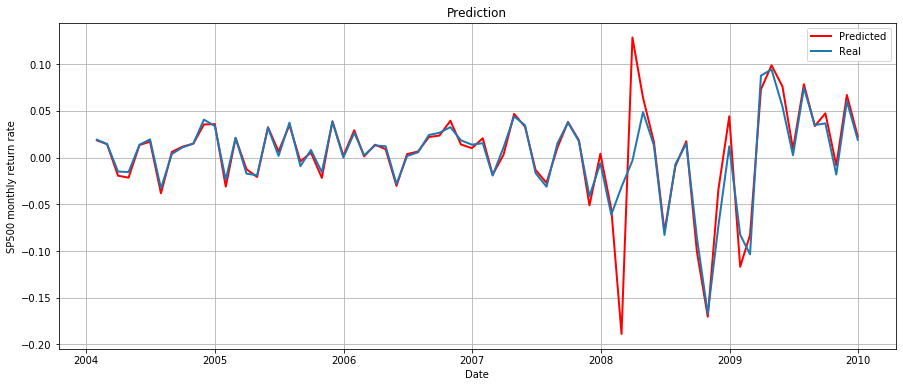

In [20]:
y_pred = grid_rid.predict(x_scaled_test)



plt.figure().set_size_inches(15, 6)
line_pred, = plt.plot(data.iloc[408:,0], y_pred, color = 'red', lw = 2)
line_true, = plt.plot(data.iloc[408:,0], y_test, lw = 2)
plt.grid()

plt.ylabel('SP500 monthly return rate')
plt.xlabel('Date')
plt.title('Prediction')
plt.legend([line_pred, line_true], ['Predicted', 'Real'])

### This model seems to catch quite good(probably too much) the real value except for 2008.

### Let's look at the MSE and MAE

Text(0.5, 1.0, 'MAE')

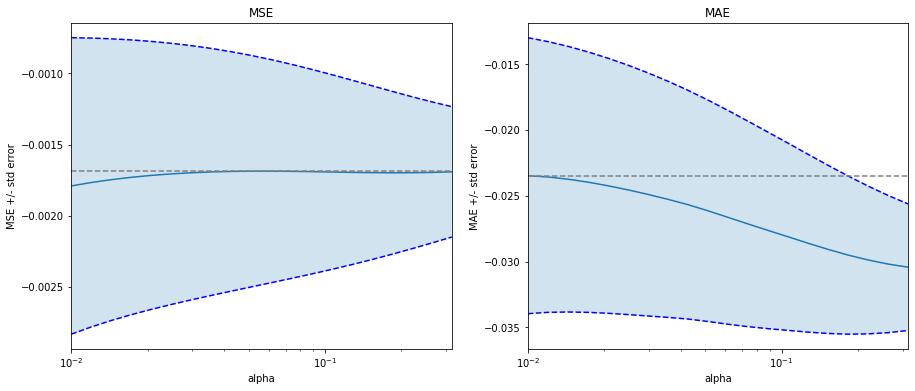

In [34]:
MSE_rid = grid_rid.cv_results_['mean_test_neg_mean_squared_error']
MSE_std_rid = grid_rid.cv_results_['std_test_neg_mean_squared_error']

MAE_rid = grid_rid.cv_results_['mean_test_neg_mean_absolute_error']
MAE_std_rid = grid_rid.cv_results_['std_test_neg_mean_absolute_error']

plt.figure().set_size_inches(15, 6)

ax = plt.subplot(1,2,1)
plt.semilogx(alphas, MSE_rid)
std_error = MSE_std_rid/ np.sqrt(5) # 5 because TimeSeriesSplit has as default value n_folds = 5

plt.semilogx(alphas, MSE_rid + std_error, 'b--')
plt.semilogx(alphas, MSE_rid - std_error, 'b--')

plt.fill_between(alphas, MSE_rid + std_error, MSE_rid - std_error, alpha=0.2)

plt.ylabel('MSE +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(MSE_rid), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.title("MSE")


ax = plt.subplot(1,2,2)
plt.semilogx(alphas, MAE_rid)
std_error = MAE_std_rid/ np.sqrt(5)

plt.semilogx(alphas, MAE_rid + std_error, 'b--')
plt.semilogx(alphas, MAE_rid - std_error, 'b--')

plt.fill_between(alphas, MAE_rid + std_error, MAE_rid - std_error, alpha=0.2)

plt.ylabel('MAE +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(MAE_rid), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.title("MAE")



In [80]:
print(grid_rid.cv_results_['rank_test_neg_mean_squared_error'][0])
print(grid_rid.cv_results_['rank_test_neg_mean_absolute_error'][0])

20
1


In [33]:
# 19 and 0 comes from the rank returned by 'grid_rid.cv_results_'
print("Best parameter alpha:%s, MSE=%s, MAE=%s" % (grid_rid.best_params_['alpha'], -MSE_rid[19], -MAE_rid[0] ))

Best parameter alpha:0.06158482110660264, MSE=0.00169159293806167, MAE=0.023470022931055663


## Let now see how the Gridsearch with **Lasso** perform:

In [35]:
alphas = np.logspace(-5, -3.5, 20) 
params = [{'alpha': alphas}]

lasso = Lasso(random_state=90, max_iter=1000)
grid_las = GridSearchCV(lasso, params, cv=tss,scoring = ['neg_mean_squared_error','neg_mean_absolute_error'], refit= 'neg_mean_squared_error', n_jobs = -1)
grid_las.fit(x_scaled_train, y_train)


C:\Users\GP_HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019956937670463953, tolerance: 8.428940747727037e-05
  positive)


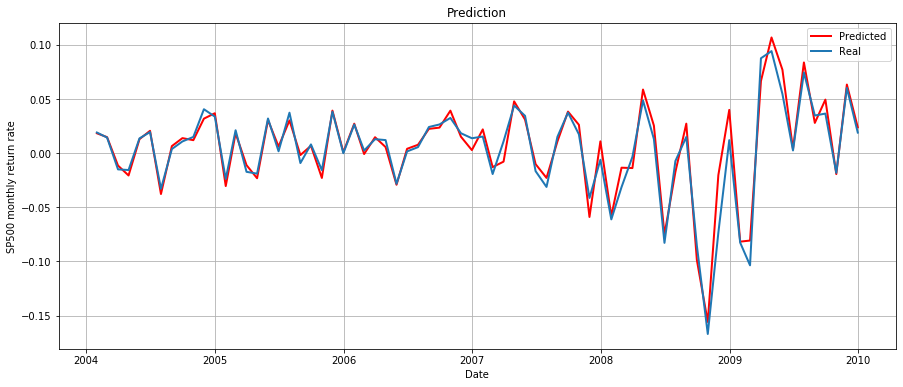

In [36]:
y_pred = grid_las.predict(x_scaled_test)



plt.figure().set_size_inches(15, 6)
line_pred, = plt.plot(data.iloc[408:,0], y_pred, color = 'red', lw = 2)
line_true, = plt.plot(data.iloc[408:,0], y_test, lw = 2)
plt.grid()

plt.ylabel('SP500 monthly return rate')
plt.xlabel('Date')
plt.title('Prediction')
plt.legend([line_pred, line_true], ['Predicted', 'Real'])

### Lasso seems to go better than Ridge, and that is predictable since Lasso works better with deep dataset where it can select the best features, however there is a high probability that we are overfitting.

Text(0.5, 1.0, 'MAE')

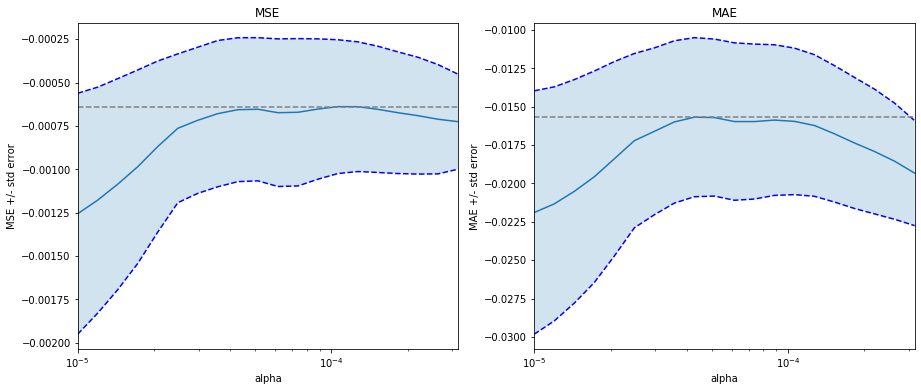

In [37]:
MSE_las = grid_las.cv_results_['mean_test_neg_mean_squared_error']
MSE_std_las = grid_las.cv_results_['std_test_neg_mean_squared_error']

MAE_las = grid_las.cv_results_['mean_test_neg_mean_absolute_error']
MAE_std_las = grid_las.cv_results_['std_test_neg_mean_absolute_error']

plt.figure().set_size_inches(15, 6)

ax = plt.subplot(1,2,1)
plt.semilogx(alphas, MSE_las)
std_error = MSE_std_las/ np.sqrt(5) # 5 because TimeSeriesSplit has as default value n_folds = 5

plt.semilogx(alphas, MSE_las + std_error, 'b--')
plt.semilogx(alphas, MSE_las - std_error, 'b--')

plt.fill_between(alphas, MSE_las + std_error, MSE_las - std_error, alpha=0.2)

plt.ylabel('MSE +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(MSE_las), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.title("MSE")


ax = plt.subplot(1,2,2)
plt.semilogx(alphas, MAE_las)
std_error = MAE_std_las/ np.sqrt(5)

plt.semilogx(alphas, MAE_las + std_error, 'b--')
plt.semilogx(alphas, MAE_las - std_error, 'b--')

plt.fill_between(alphas, MAE_las + std_error, MAE_las - std_error, alpha=0.2)

plt.ylabel('MAE +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(MAE_las), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.title("MAE")

In [81]:
print(grid_las.cv_results_['rank_test_neg_mean_squared_error'][0])
print(grid_las.cv_results_['rank_test_neg_mean_absolute_error'][0])

20
20


In [82]:
# 19 and 19 comes from the rank returned by 'grid_rid.cv_results_'
print("Best parameter alpha:%s, MSE=%s, MAE=%s" % (grid_las.best_params_['alpha'], -MSE_las[19], -MAE_las[19] ))

Best parameter alpha:0.0001062467830894041, MSE=0.0007258178285414389, MAE=0.019338014130423263


## Gridsearch with ElasticNet
### Let's see if a combination of Lasso and Ridge could return better results


In [49]:

elastic = ElasticNet(random_state= 90)
params = {'alpha':np.logspace(-2,4,40),'l1_ratio':[.2,.4,.6,.8]}
grid_enet = GridSearchCV(estimator=elastic,
                    param_grid = params,
                    scoring=['neg_mean_squared_error','neg_mean_absolute_error'],
                    refit = 'neg_mean_squared_error',
                    cv = tss, 
                    n_jobs = -1)
grid_enet.fit(x_scaled_train, y_train)
 

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=90, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02,...
       2.03091762e+02, 2.89426612e+02, 4.12462638e+02, 5.87801607e+02,
       8.37677640e+02, 1.19377664e+03, 1.70125428e+03, 2.42446202e+03,
       3.45510729e+03, 4.92388263e+03, 7.01703829e+03, 1.00000000e+04]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
             return_train_score=False,
             scoring=['neg_mean_squared_error', 'neg_mea

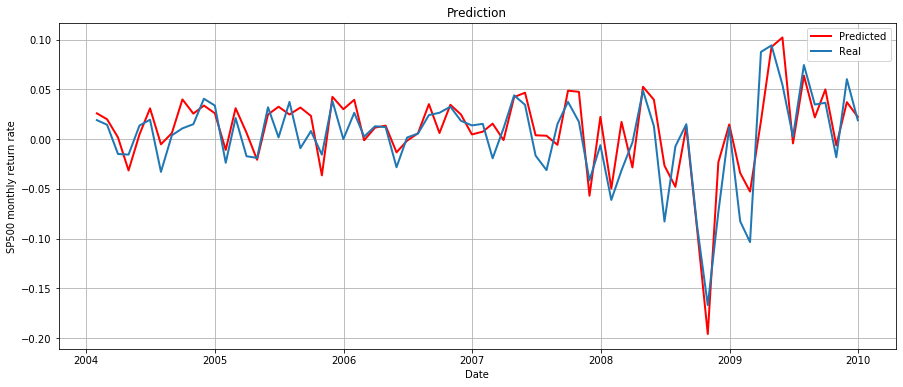

In [50]:
y_pred = grid_enet.predict(x_scaled_test)



plt.figure().set_size_inches(15, 6)
line_pred, = plt.plot(data.iloc[408:,0], y_pred, color = 'red', lw = 2)
line_true, = plt.plot(data.iloc[408:,0], y_test, lw = 2)
plt.grid()

plt.ylabel('SP500 monthly return rate')
plt.xlabel('Date')
plt.title('Prediction')
plt.legend([line_pred, line_true], ['Predicted', 'Real'])

## Even though ElasticNet doesn't follow exactly as Lasso and Ridge, I think we could obtain better results on the test set since it almost catches all the fluctuations

In [77]:
print(grid_enet.cv_results_['rank_test_neg_mean_squared_error'][0])
print(grid_enet.cv_results_['rank_test_neg_mean_absolute_error'][0])

4
4


In [57]:
MSE_enet = grid_enet.cv_results_['mean_test_neg_mean_squared_error']
MAE_enet = grid_enet.cv_results_['mean_test_neg_mean_absolute_error']

# 3 and 3 comes from the 1°st of the rank returned by 'grid_enet.cv_results_'
print("Best parameter:{}, MSE={:.5f}, MAE={:.5f}".format(grid_enet.best_params_, -MSE_enet[3], -MAE_enet[3])) 

Best parameter:{'alpha': 0.014251026703029978, 'l1_ratio': 0.2}, MSE=0.00090, MAE=0.02322


### Until now as expected ElasticNet is the better one(looking at MSE)

# Polynomial features

### I will try polynomial features to see if I can get better result, I think that the combination of the features could produce a better result

In [64]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(x_scaled)

In [65]:
x_scaled_train = X_poly[:408]


x_scaled_test = X_poly[408:]

In [71]:
params = {'alpha':np.logspace(-2,4,40),'l1_ratio':[.2,.4,.6,.8]}

grid_poly = GridSearchCV(elastic, params, cv = tss,scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error'], refit = 'neg_mean_squared_error', n_jobs = -1)
grid_poly.fit(x_scaled_train, y_train)



GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=90, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02,...
       2.03091762e+02, 2.89426612e+02, 4.12462638e+02, 5.87801607e+02,
       8.37677640e+02, 1.19377664e+03, 1.70125428e+03, 2.42446202e+03,
       3.45510729e+03, 4.92388263e+03, 7.01703829e+03, 1.00000000e+04]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
             return_train_score=False,
             scoring=['neg_mean_squared_error', 'neg_mea

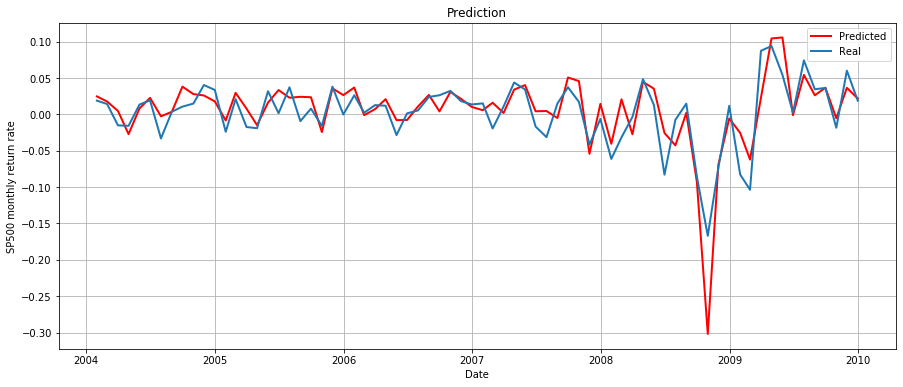

In [72]:
y_pred = grid_poly.predict(x_scaled_test)



plt.figure().set_size_inches(15, 6)
line_pred, = plt.plot(data.iloc[408:,0], y_pred, color = 'red', lw = 2)
line_true, = plt.plot(data.iloc[408:,0], y_test, lw = 2)
plt.grid()

plt.ylabel('SP500 monthly return rate')
plt.xlabel('Date')
plt.title('Prediction')
plt.legend([line_pred, line_true], ['Predicted', 'Real'])

In [73]:
print(grid_poly.cv_results_['rank_test_neg_mean_squared_error'][0])
print(grid_poly.cv_results_['rank_test_neg_mean_absolute_error'][0])

15
9


In [76]:
MSE_poly = grid_poly.cv_results_['mean_test_neg_mean_squared_error']
MAE_poly = grid_poly.cv_results_['mean_test_neg_mean_absolute_error']


print("Best parameter:{}, MSE={:.5f}, MAE={:.5f}".format(grid_poly.best_params_, -MSE_poly[14], -MAE_poly[8]))

Best parameter:{'alpha': 0.01, 'l1_ratio': 0.4}, MSE=0.00155, MAE=0.02624


### The result is worse than I excpected

## Now I will look at the model that almost always goes better than everyone.Random forest

### I start with a simple Decision Tree


In [84]:
# re-set train/test modified for polynomial
x_scaled_train = x_scaled[:408]
y_train = y[:408]

x_scaled_test = x_scaled[408:]
y_test = y[408:]

In [85]:
dt = DecisionTreeRegressor()
parameters = {'max_depth': range(1,19)}

grid_dt = GridSearchCV(dt, parameters, cv = tss, scoring =["neg_mean_squared_error","neg_mean_absolute_error"],refit ="neg_mean_squared_error" )
grid_dt.fit(x_scaled_train,y_train)



0.0013404652199591842 {'max_depth': 3}


In [ ]:
y_pred = grid_dt.predict(x_scaled_test)



plt.figure().set_size_inches(15, 6)
line_pred, = plt.plot(data.iloc[408:,0], y_pred, color = 'red', lw = 2)
line_true, = plt.plot(data.iloc[408:,0], y_test, lw = 2)
plt.grid()

plt.ylabel('SP500 monthly return rate')
plt.xlabel('Date')
plt.title('Prediction')
plt.legend([line_pred, line_true], ['Predicted', 'Real'])

In [86]:
print(grid_dt.cv_results_['rank_test_neg_mean_squared_error'][0])
print(grid_dt.cv_results_['rank_test_neg_mean_absolute_error'][0])

3
3


In [87]:
MSE_dt = grid_dt.cv_results_['mean_test_neg_mean_squared_error']
MAE_dt = grid_dt.cv_results_['mean_test_neg_mean_absolute_error']


print("Best parameter:{}, MSE={:.5f}, MAE={:.5f}".format(grid_dt.best_params_, -MSE_dt[2], -MAE_dt[2]))

Best parameter:{'max_depth': 3}, MSE=0.00134, MAE=0.02771


## Random Forest

In [88]:
rf = RandomForestRegressor(n_estimators = 300, oob_score = True) 
params = {'max_depth': [6,8], 'min_samples_split': [12,15,18], 'min_samples_leaf': [2,3,6]}

grid_rf = GridSearchCV(rf, param_grid = params, cv = tss, scoring = ['neg_mean_squared_error','neg_mean_absolute_error' ], refit = 'neg_mean_squared_error',n_jobs = -1)

grid_rf.fit(x_scaled_train,y_train)



GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_e...ators=300, n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose

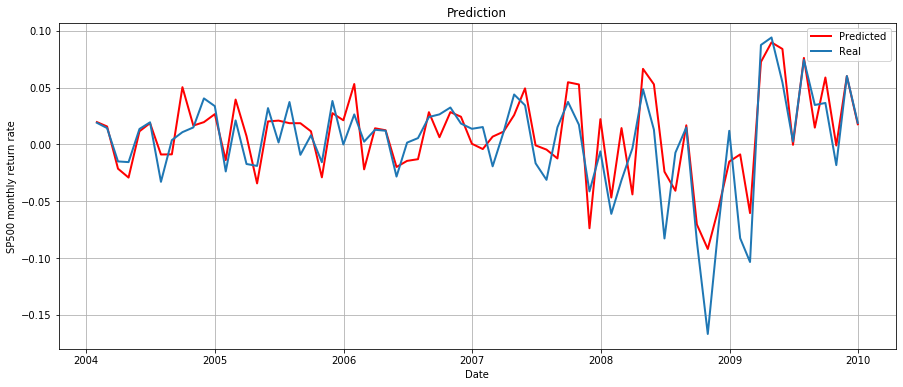

In [89]:
y_pred = grid_rf.predict(x_scaled_test)



plt.figure().set_size_inches(15, 6)
line_pred, = plt.plot(data.iloc[408:,0], y_pred, color = 'red', lw = 2)
line_true, = plt.plot(data.iloc[408:,0], y_test, lw = 2)
plt.grid()

plt.ylabel('SP500 monthly return rate')
plt.xlabel('Date')
plt.title('Prediction')
plt.legend([line_pred, line_true], ['Predicted', 'Real'])

In [90]:
print(grid_rf.cv_results_['rank_test_neg_mean_squared_error'][0])
print(grid_rf.cv_results_['rank_test_neg_mean_absolute_error'][0])

8
8


In [91]:
MSE_rf = grid_rf.cv_results_['mean_test_neg_mean_squared_error']
MAE_rf = grid_rf.cv_results_['mean_test_neg_mean_absolute_error']


print("Best parameter:{}, MSE={:.5f}, MAE={:.5f}".format(grid_rf.best_params_, -MSE_rf[7], -MAE_rf[7]))

Best parameter:{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 12}, MSE=0.00090, MAE=0.02253


# Neural Networks

## I will try NN although I know that often is not necessary since random forest works very good

In [93]:
# initializing the NN
regressor = Sequential()

# first layer (input)
regressor.add(Dense(units = 76, activation = 'relu', input_dim = 150))

# dropout(to avoid overfitting)
regressor.add(Dropout(.2))

# second hidden layer
regressor.add(Dense(units = 76,  activation = 'relu'))

# dropout(to avoid overfitting)
regressor.add(Dropout(.2))

# Adding the output layer
regressor.add(Dense(units = 1, activation = 'linear'))

regressor.summary()

regressor.compile(optimizer = Adam(), loss = 'mean_squared_error', metrics = ['mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 76)                11476     
_________________________________________________________________
dropout_1 (Dropout)          (None, 76)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 76)                5852      
_________________________________________________________________
dropout_2 (Dropout)          (None, 76)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 77        
Total params: 17,405
Trainable params: 17,405
Non-trainable params: 0
_________________________________________________________________


In [94]:
batch_size = 30
epochs = 100
history = regressor.fit(x_scaled_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1)

score = regressor.evaluate(x_scaled_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/100
408/408 [==============================] - 1s 1ms/step - loss: 0.3502 - mae: 0.4509
Epoch 2/100
408/408 [==============================] - 0s 278us/step - loss: 0.2083 - mae: 0.3550
Epoch 3/100
408/408 [==============================] - 0s 400us/step - loss: 0.1587 - mae: 0.3036
Epoch 4/100
408/408 [==============================] - 0s 622us/step - loss: 0.1201 - mae: 0.2612
Epoch 5/100
408/408 [==============================] - 0s 542us/step - loss: 0.1056 - mae: 0.2421
Epoch 6/100
408/408 [==============================] - 0s 508us/step - loss: 0.0806 - mae: 0.2209
Epoch 7/100
408/408 [==============================] - 0s 366us/step - loss: 0.0735 - mae: 0.2051
Epoch 8/100
408/408 [==============================] - 0s 680us/step - loss: 0.0576 - mae: 0.1864
Epoch 9/100
408/408 [==============================] - 0s 381us/step - loss: 0.0515 - mae: 0.1718
Epoch 10/100
408/408 [==============================] - 0s 261us/step - loss: 0.0526 - mae: 0.1723
Epoch 11/100
408/408

408/408 [==============================] - 0s 613us/step - loss: 0.0019 - mae: 0.0337
Epoch 82/100
408/408 [==============================] - 0s 571us/step - loss: 0.0019 - mae: 0.0321
Epoch 83/100
408/408 [==============================] - 0s 498us/step - loss: 0.0017 - mae: 0.0312
Epoch 84/100
408/408 [==============================] - 0s 299us/step - loss: 0.0014 - mae: 0.0288
Epoch 85/100
408/408 [==============================] - 0s 414us/step - loss: 0.0016 - mae: 0.0310
Epoch 86/100
408/408 [==============================] - 0s 357us/step - loss: 0.0017 - mae: 0.0325
Epoch 87/100
408/408 [==============================] - 0s 490us/step - loss: 0.0014 - mae: 0.0285 0s - loss: 0.0014 - mae: 0.028
Epoch 88/100
408/408 [==============================] - 0s 624us/step - loss: 0.0016 - mae: 0.0305
Epoch 89/100
408/408 [==============================] - 0s 436us/step - loss: 0.0014 - mae: 0.0285
Epoch 90/100
408/408 [==============================] - 0s 432us/step - loss: 0.0016 - mae:

In [95]:
print("MSE={:.5f}, MAE={:.5f}".format(-score[0], -score[1]))

MSE=-0.00207, MAE=-0.03292


# C) Best model selection

In [98]:
data_all = pd.read_csv("timeseries_all.csv", sep = ";")

data_test = pd.read_csv("timeseries_test.csv", sep = ";")

In [99]:
data_test['csp']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
118   NaN
119   NaN
120   NaN
121   NaN
122   NaN
Name: csp, Length: 123, dtype: float64

In [100]:
# dropping the same columns as the train set
data_test = data_test.drop(columns_to_drop, axis = 1)

In [101]:
# dropping also the target variable and this'csp' that has all NaNs 
data_test = data_test.drop(["Unnamed: 162", "csp"], axis = 1)

In [102]:
# filling with the mean
data_test.fillna(data_test.mean(), inplace = True)

In [103]:
data_test.isna().any().sum()

0

In [110]:
data_test['HWI'] = data_test['HWI'].astype(float)

x_TEST = data_test.select_dtypes(include = 'float64')

# scaling
x_TEST_scaled = sc.fit_transform(x_TEST)

# transforming for polynomial
x_TEST_poly = poly.fit_transform(x_TEST_scaled)

# selecting the target variable to compare
y_TEST = data_all.iloc[480:603, -1]

## Next I will predict to evaluate the MSE

In [111]:
# gridsearch with ridge
y_pred_gr = grid_rid.predict(x_TEST_scaled)
mse_gr = mean_squared_error(y_TEST, y_pred_gr)

# gridsearch with lasso
y_pred_gl = grid_las.predict(x_TEST_scaled)
mse_gl = mean_squared_error(y_TEST, y_pred_gl)

# gridsearch with elasticnet
y_pred_ge = grid_enet.predict(x_TEST_scaled)
mse_ge = mean_squared_error(y_TEST, y_pred_ge)

#gridsearch with elasticnet using polynomial features
y_pred_gp = grid_poly.predict(x_TEST_poly)
mse_gp = mean_squared_error(y_TEST, y_pred_gp)

#gridserch with decision tree
y_pred_gd = grid_dt.predict(x_TEST_scaled)
mse_gd = mean_squared_error(y_TEST, y_pred_gd)

# gridsearch with randomforest 
y_pred_grf = grid_rf.predict(x_TEST_scaled)
mse_grf = mean_squared_error(y_TEST, y_pred_grf)

# neural networks
score = regressor.evaluate(x_TEST_scaled, y_TEST, verbose=1)
mse_nn = score[0]

123/123 [==============================] - ETA:  - 0s 996us/step


In [114]:
print("MSE(GridSearch with Ridge): {:>27.6f}".format(mse_gr))
print("MSE(GridSearch with Lasso): {:>27.6f}".format(mse_gl))
print("MSE(GridSearch with ElasticNet): {:>22.6f}".format(mse_ge))
print("MSE(GridSearch with ElasticNet(PolyFeatures)): {:.6f}".format(mse_gr))
print("MSE(GridSearch with DecisionTree): {:>20.6f}".format(mse_gd))
print("MSE(GridSearch with RandomForest): {:>20.6f}".format(mse_grf))
print("MSE(Neural Network): {:>34.6f}".format(mse_nn))

MSE(GridSearch with Ridge):                    0.045464
MSE(GridSearch with Lasso):                    0.036397
MSE(GridSearch with ElasticNet):               0.000855
MSE(GridSearch with ElasticNet(PolyFeatures)): 0.045464
MSE(GridSearch with DecisionTree):             0.001515
MSE(GridSearch with RandomForest):             0.000861
MSE(Neural Network):                           0.002043


## The best model are: Gridsearch with ElasticNet and Random Forest
### I will plot the result for the best one, that is the Gridsearch 

In [115]:
data_test['dates'] = pd.to_datetime(data_test['dates'])

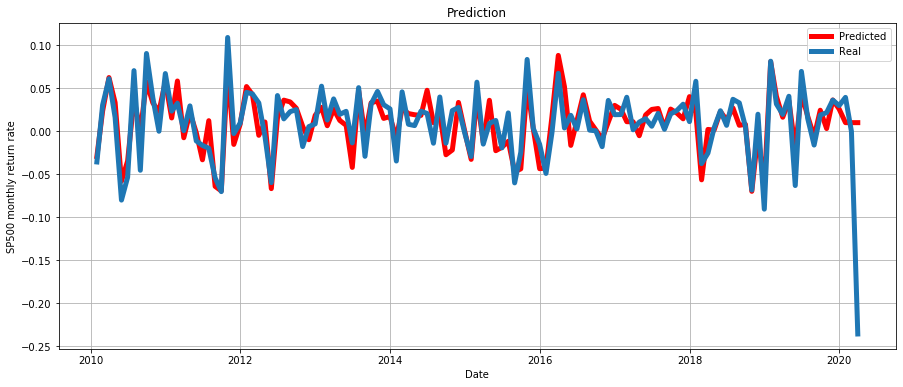

In [124]:

plt.figure().set_size_inches(15, 6)
line_pred, = plt.plot(data_test['dates'], y_pred_ge, color = 'red', lw = 5)
line_true, = plt.plot(data_test['dates'], y_TEST, lw = 5)
plt.grid()

plt.ylabel('SP500 monthly return rate')
plt.xlabel('Date')
plt.title('Prediction')
plt.legend([line_pred, line_true], ['Predicted', 'Real'])

## Let's see if with our model we could have made some money 

In [125]:
tot = 1

In [123]:

for i in y_pred_ge:
    return_per_month = tot*i
    tot = tot + return_per_month
tot

3.185976193888734

## So we would have obtained a $318\%$ gain for every euro invested!

#### Probably there is a feature(S&P 500, S&P 500 PE Ratio) that helps too much the algorithms 

In [166]:
# This is the real one
for i in y_TEST:
    return_per_month = tot*i
    tot = tot + return_per_month
tot

2.827406442318841